In [48]:
# Ch 03-3 특성 공학과 규제

여러 특성을 사용한 다중 회귀에 대해 배우고 사이킷런의 여러 도구를 사용해봅시다.
복잡한 모델의 과대적합을 막기 위한 릿지와 라쏘 회귀를 배웁니다.

### 특성 공학 
기존의 특성을 사용해 새로운 특성을 뽑아내는 작업.
길이, 높이, 두께, 길이x높이 (특성공학)

## 데이터 준비
판다스 를 이용

- 판다스의 데이터 프레임은 핵심 데이터 구조.
- 넘파이 배욜로 바꾸기
- csv 파일사용
- 판다스에서 파일을 읽으려면 pd.read_csv('주소url')

SyntaxError: invalid syntax (2879409539.py, line 3)

In [ ]:
import pandas as pd
perch_full = pd.read_csv('https://bit.ly/perch_csv_data') #데이터 프레임 만들기
perch_full.head() #5개 행 출력하기

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [ ]:
# perch_data 입력
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [1]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

NameError: name 'perch_full' is not defined

## 사이킷런의 변환기 transformer

### 'PolynomialFeatures' 클래스 (sklearn.preprocessing)
* 클래스 위치:

from sklearn.preprocessing import PolynomialFeatures

* 정의:

PolynomialFeatures는 입력 데이터(x)에 대해
x², x³, ... 등 고차항(feature)을 자동으로 생성해주는 변환기(transformer) 
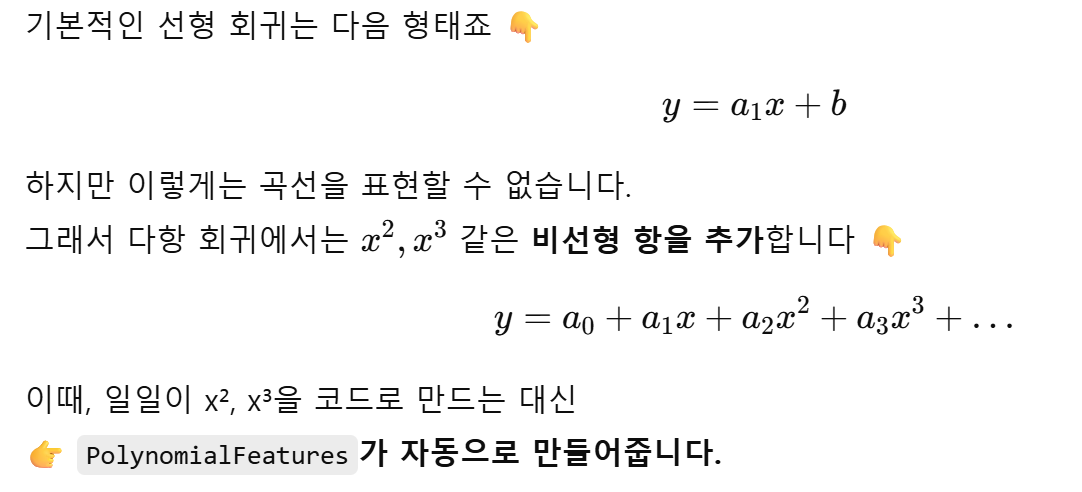


✅ 기본 구조
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

파라미터	            설명
degree	                몇 차항까지 만들지 (기본값: 2차)
include_bias	        상수항(1) 포함 여부. False로 하면 절편항을 따로 다룸
interaction_only	    교차항(x₁×x₂)만 생성할지 여부 (기본: False)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures()
poly.fit([[2, 3]]) #입력 데이터의 feature 개수가 2개 학습. x1=2, x2=3이라는 2개 특서이 있다고 기억하는 
print(poly.transform([[2, 3]])) #transform() = 실제 변환을 수행하는 함수

[[1. 2. 3. 4. 6. 9.]]


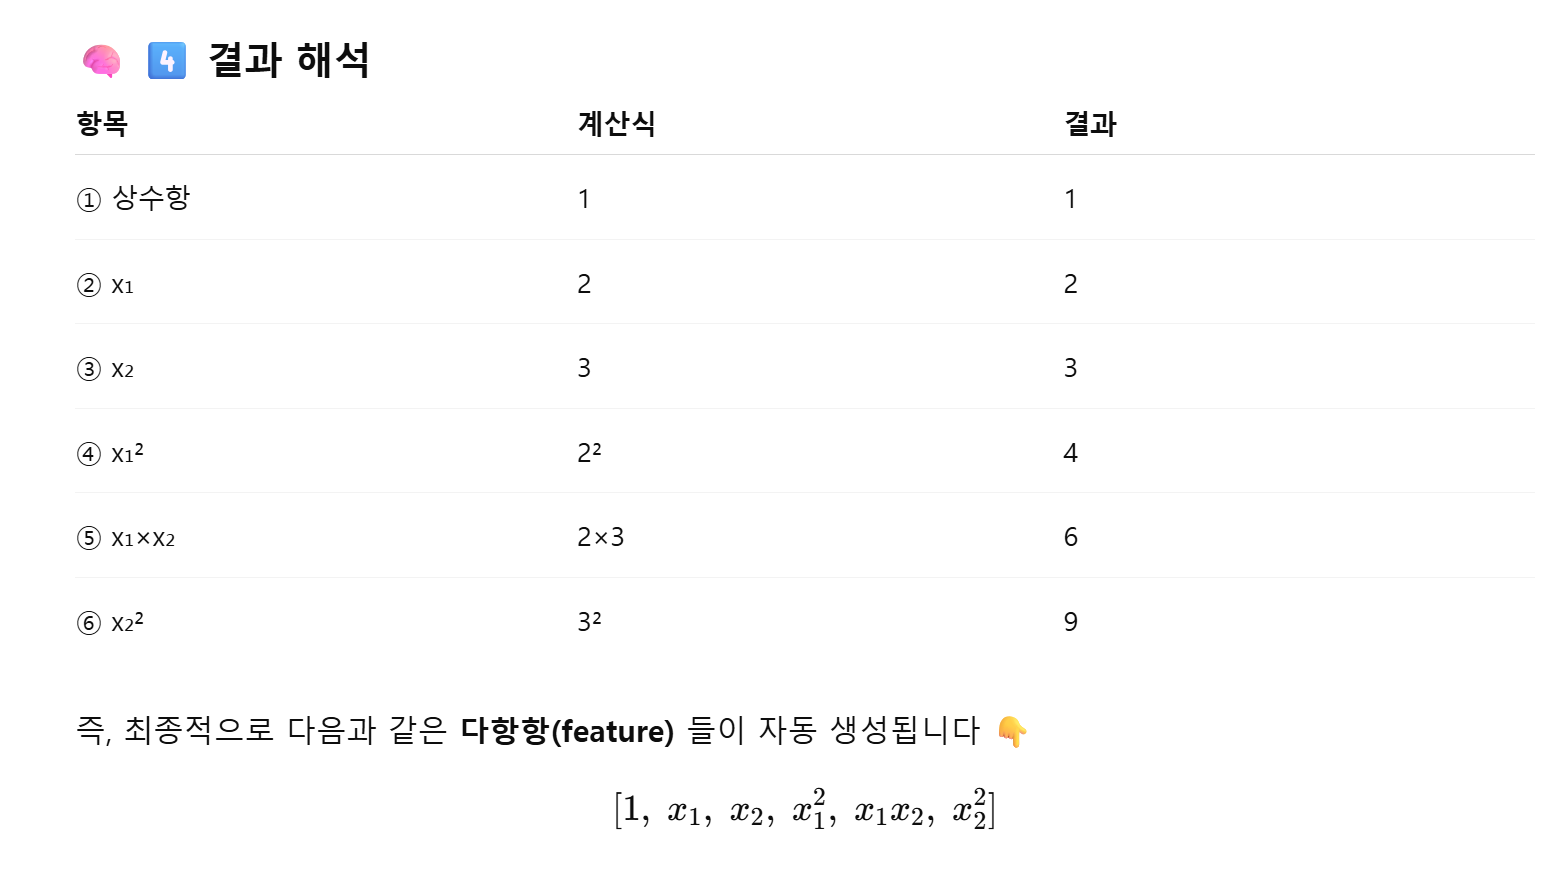

* 참고
fit 을 먼저 해야 transform이 가능하다

### poly 와 skl의 선형  공식
사이킷런의 선형 모델은 자동으로 절편을 추가함.
따라서 includ_bias=False로 지정하여 특성을 변환



In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]])) # 1제거됨

[[2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit (train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [ ]:
poly.get_feature_names_out()  # poly 가 어떤 특성의 조합으로 만들어졌는지 확인

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [ ]:
test_poly = poly.transform(test_input) # 테스트 세트 변환

## 다중 회귀 모델 훈련하기
다중 회귀 모델을 훈련 = 선형 회귀 모델을 여러 개의 특성을 사용하여 수행하는 것
따라서 LinearRegression class를 임프토 하고 train_poly를 사용해 모델을 훈련

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [ ]:
print(lr.score(test_poly, test_target))

0.9714559911594155


In [ ]:
#5제곱까지 추가해보기

poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [ ]:
#다시 훈련
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target)) #거의 완벽한 점수?

0.9999999999938143


In [ ]:
# 테스트 세트에 대한 점수
print(lr.score(test_poly, test_target))

# 특성 개수를 크게 늘리면, 선형 모델은 아주 강력해지나, 훈련 세트에 너무 과대적합되므로 테스트 세트 점수는 낮아짐
# 따라서 특성 개수를 늘리려면 샘플 개수가 많았어야?

-144.40744533753661


## 규제 regularization
머신러닝 모델이 훈련  세트를 너무 과도하게 학습하지 못하도록 훼방하는 것.
선형 회귀 모델의 경우 특성에 곱해지는 계수의 크기를 작게 만드는 일 

### <StandardScaler>
입력 데이터의 스케일(단위, 크기 차이) 를 맞춰주는 역할
클래스 위치:

from sklearn.preprocessing import StandardScaler


정의:

StandardScaler는 각 feature(특성)의 평균을 0, 표준편차를 1로 맞춰주는 표준화(Standardization) 를 수행합니다.
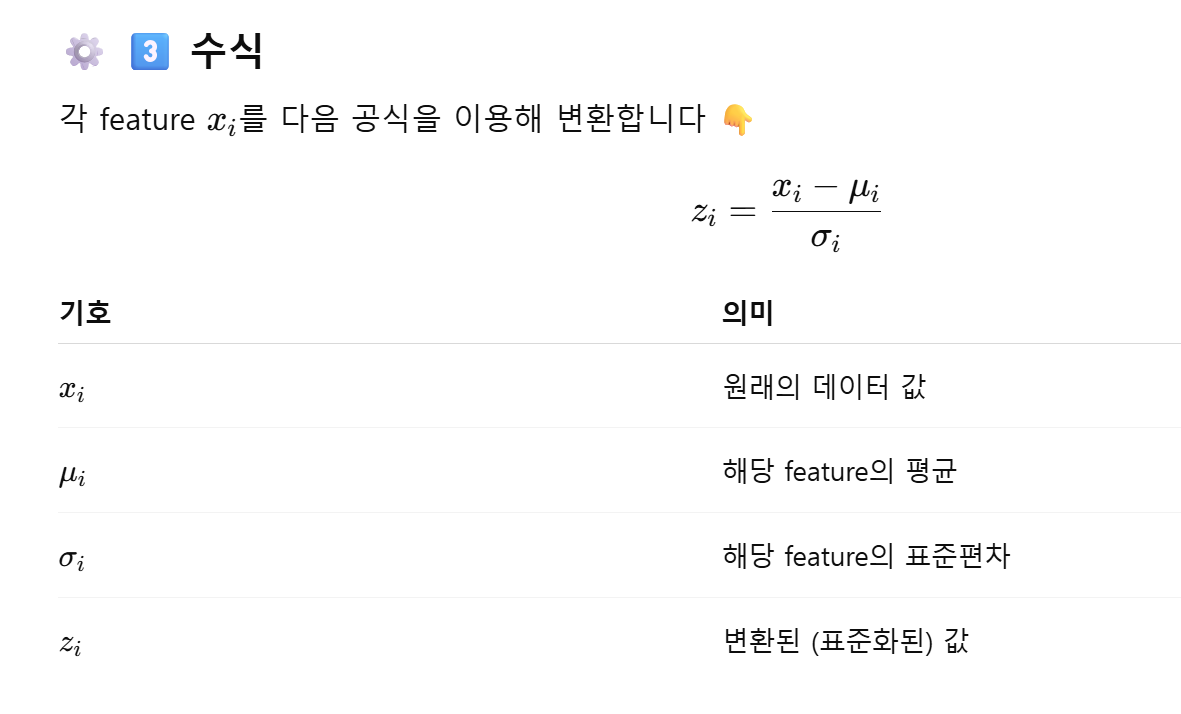

결과적으로, 변환된 데이터는

* 평균 = 0

* 표준편차 = 1
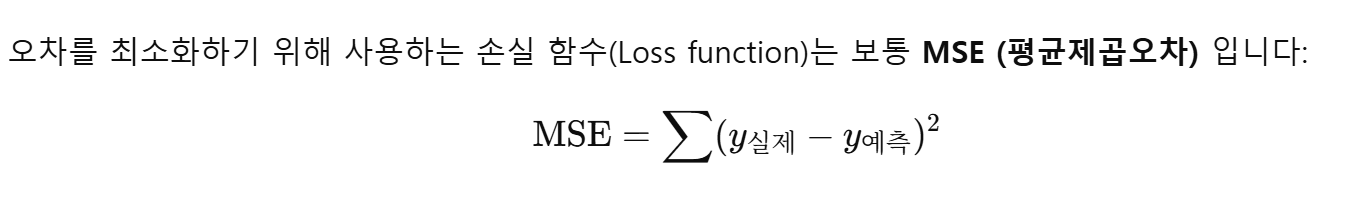

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() #ss를 초기화
ss.fit(train_poly) #standardscaler로 학습
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly) #데이터 변환 완료


선형 회귀 모델에 규제를 추가한 모델 : 릿지ridge 와 라쏘 lasso라고 부름
릿지 = 계수를 제곱한 값을 기준으로 규제
라쏘 = 계수의 절댓값을 기준으로 규제 (아예 0으로 만들 수도 있음)

## 릿지 회귀
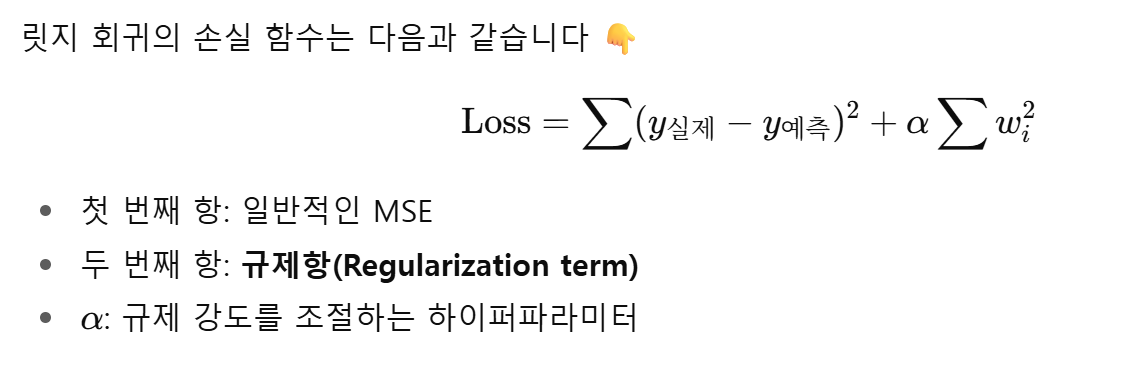
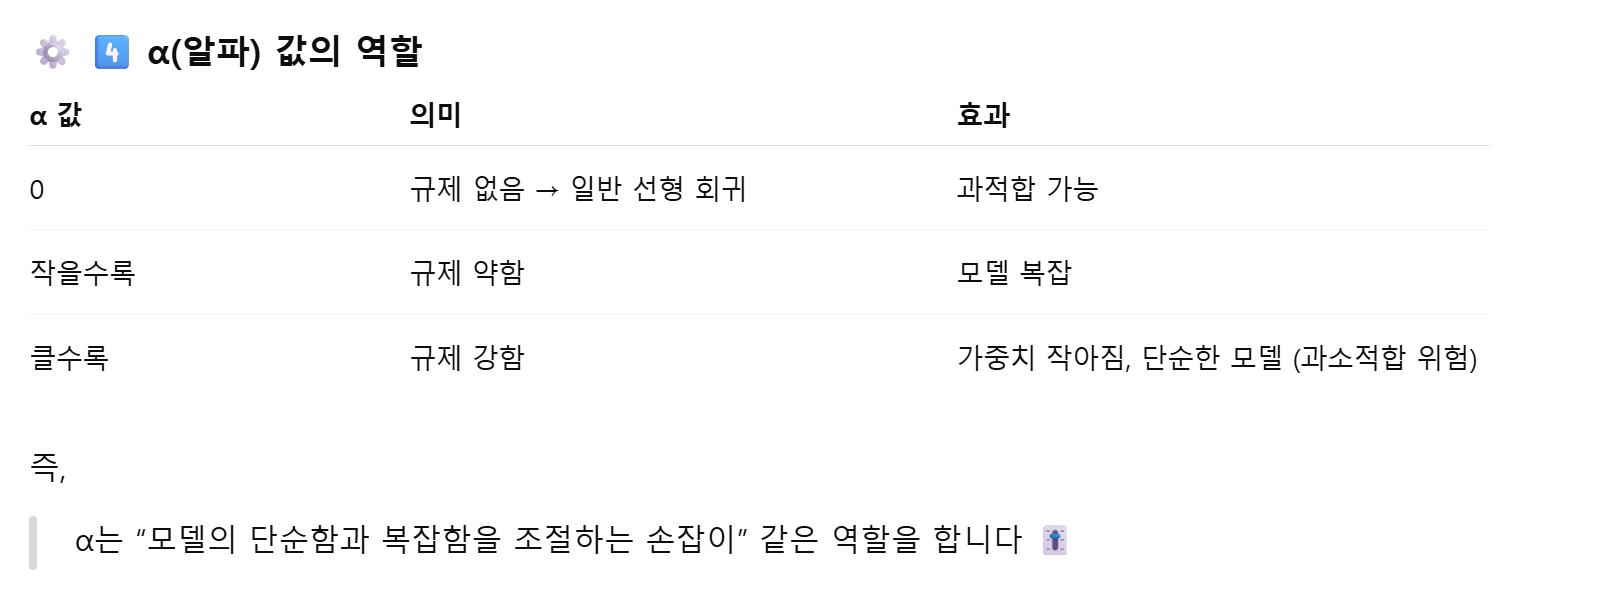

### 릿지 회귀의 직관적인 효과

일반 선형 회귀: 오차를 최대한 0에 가깝게 하려고 → 가중치가 커짐

릿지 회귀: 오차뿐 아니라 가중치 크기도 최소화하려고 → 과적합 방지

즉,

“조금 덜 정확하더라도, 너무 극단적인 가중치는 쓰지 말자.”

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target)) #선형회귀보다 조금 낮아진 정확도

0.9896101671037343


In [ ]:
print(ridge.score(test_scaled, test_target)) #정상으로 돌아온 테스트 세트 점수

0.9790693977615375


모델 객체를 만들 때 alpha 로 규제의 강도 조절 가능
* alpha 값이 크면 규제 강도가 세짐 -> 계수 값을 더 줄이고, 족므 더 과소적합이 되도록 유도
* alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해짐 - 과대 적합이 될 가능성. 

이렇게 사람이 알려줘야 하는 파라미터 = 하이퍼파라미터

### 어떻게 적절한 alpha 값을 찾을 수 있을까?
= alpha 값에 대한 R^2 값의 그래프를 그려보기.
- 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점 = 최적의 alpha값 


In [ ]:
# 1. matplotlib을 임포트 하고 alpha값을 바꿀 때마다 score() 매서드의 결과를 저장할 리스트 만들기
import matplotlib.pyplot as plt
train_score = []
test_score = []


In [ ]:
#2. alpha값을 0.001에서 100까지 10배씩 늘려서 릿지 회귀 모델을 훈련하고 리스트에 저장
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #ridge 모델 만들기
    ridge = Ridge(alpha=alpha)
    #ridge 모델 훈련
    ridge.fit(train_scaled, train_target)
    #훈련 점수와 테스트 점수 넣기
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

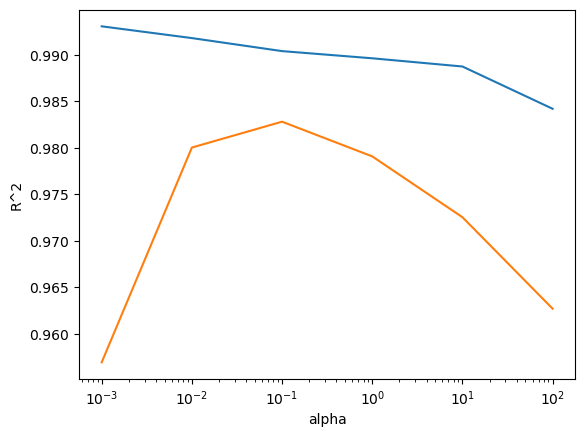

In [ ]:
#그래프 그려보기
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

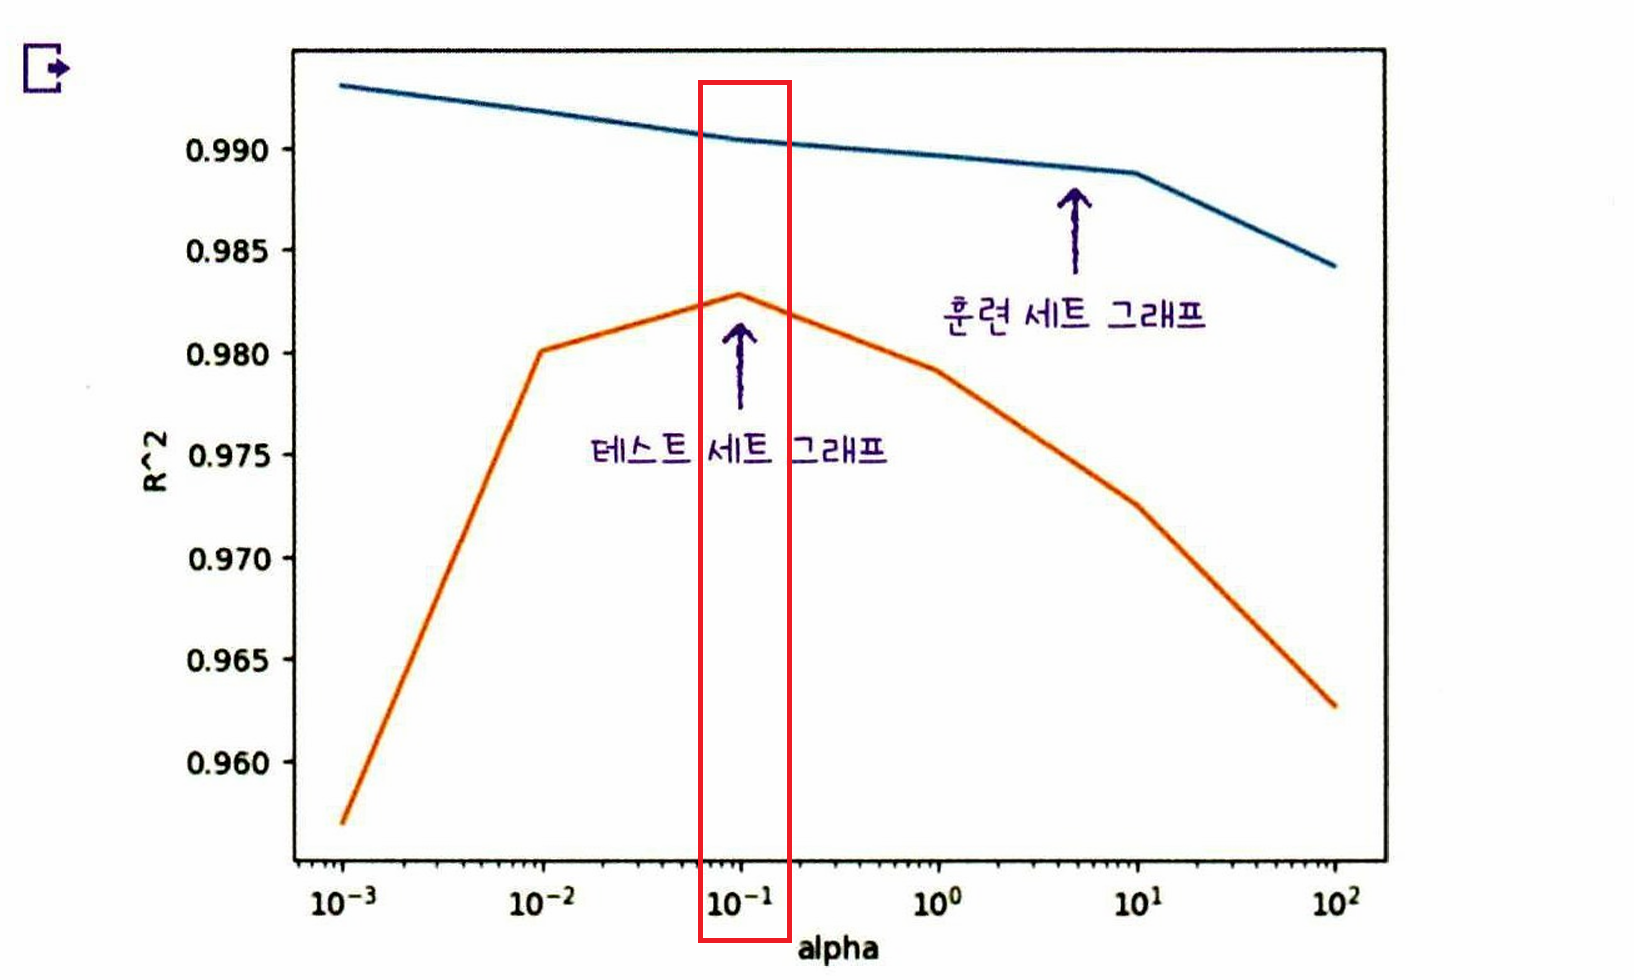
두 그래프가 가장 가까운 지점 = 가장 적합한 alpha 값 
위에서는 0.1

In [ ]:
#3. 최적의 알파값으로 모델 훈련
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386995


## 라쏘 회귀
클래스 위치:

from sklearn.linear_model import Lasso


정의:

라쏘(Lasso, Least Absolute Shrinkage and Selection Operator) 회귀는
L1 정규화(L1 Regularization) 를 적용한 선형 회귀입니다.
즉, 가중치의 절댓값 합계에 패널티를 줘서 불필요한 특성(feature) 을 제거합니다.


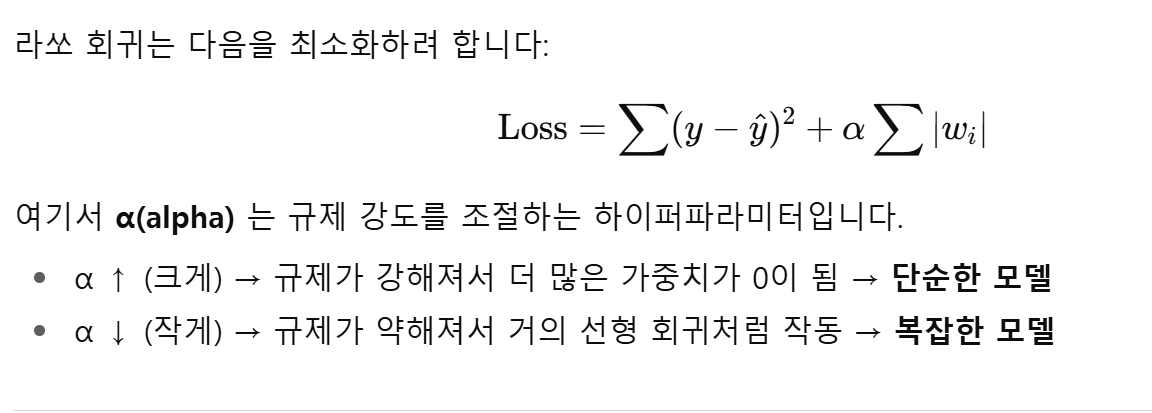

라쏘 회귀 훈련은 릿지 클래스를 라쏘 클래스로 바꾸는 것이 전부

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [ ]:
# 테스트 세트 점수
print(lasso.score(test_scaled, test_target))

0.9800593698421886


In [ ]:
#라쏘로 알파 값을 바꾸어 가며 점수 계산

train_score =[]
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #라쏘 모델 만들기
    lasso = Lasso(alpha=alpha, max_iter=30000)
    #라쏘 모델을 훈련
    lasso.fit(train_scaled, train_target)
    #훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/home/hykim/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.645e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/home/hykim/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.015e+03, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


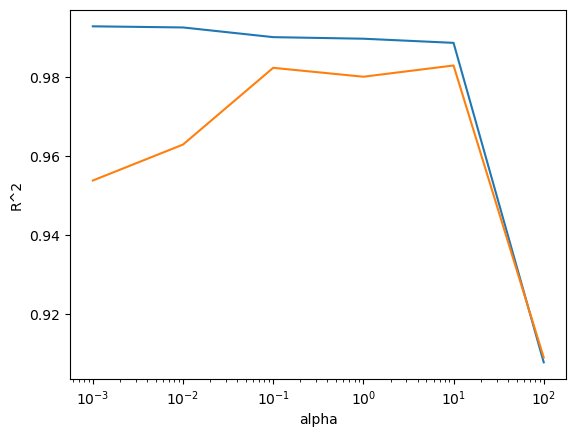

In [ ]:
# 그래프 그려보기
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

최적의 알파값
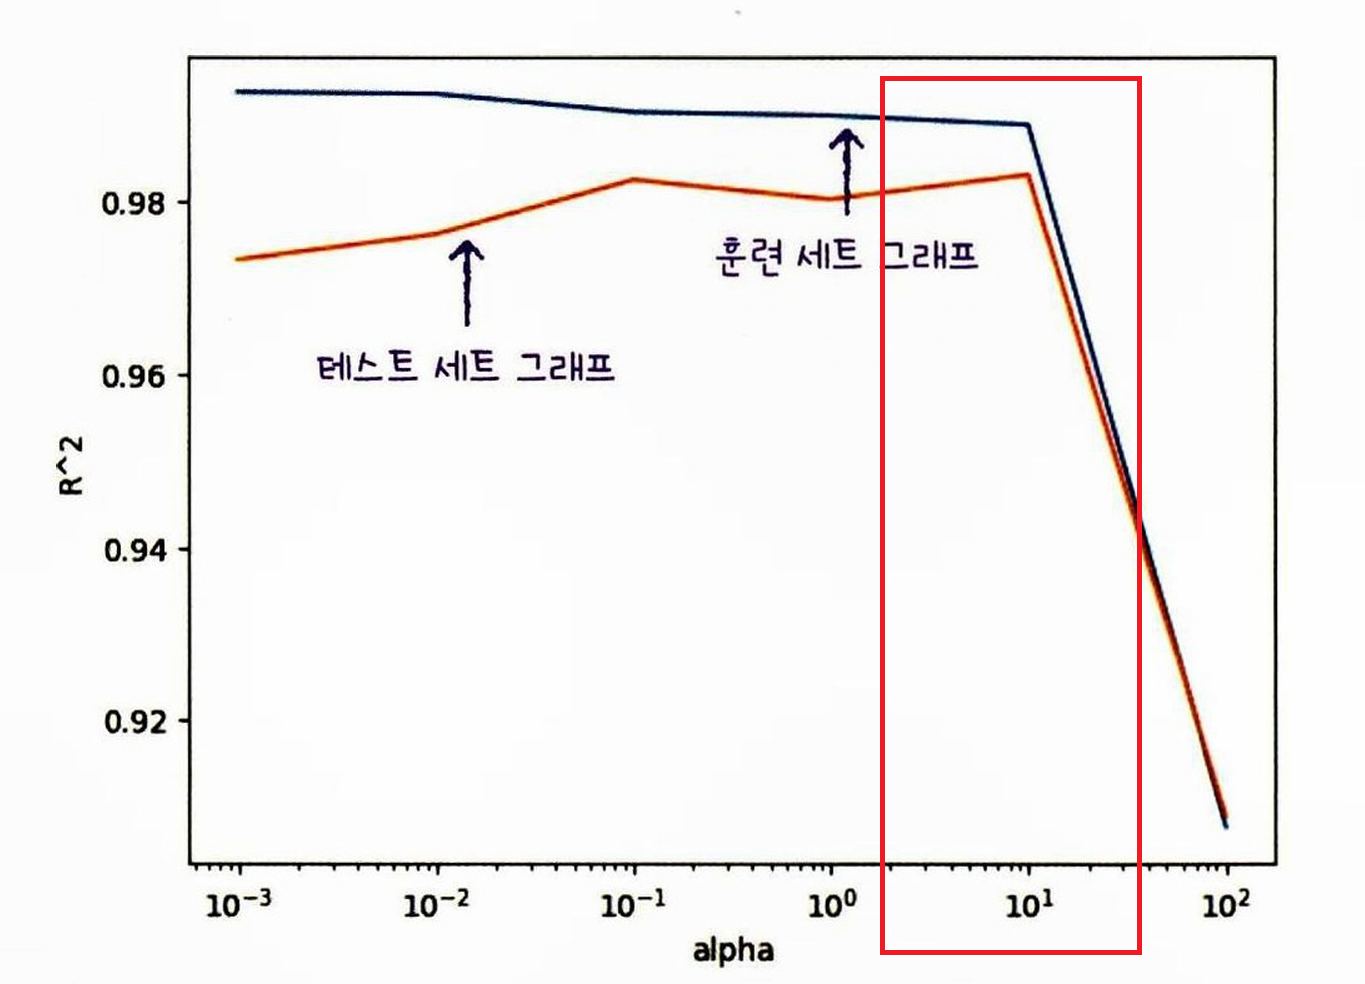
10

In [ ]:
#최적의 알파값으로 학습
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131866
0.9824470598706695


In [ ]:
#라쏘 모델은 계수 값이 0이 될 수 있다. 
#라쏘 모델 계수는 coef_속성에 저장되어 있다.
#0인 것을 찾아보면?
print(np.sum(lasso.coef_==0)) #55개중 40개가 0임

40


 np.sumO 함수는 배열을 모두 더한 값을 반환합니다. 넘파이 배열에 비교 연산자를 사용했을 때 각 원소는 True 또는 
False가 됩니다. np.sum() 함수는 True를 1 로, False를 0으로 인식하여 덧셈을 할 수 있기 때문에 마치 비교 연산자에 맞는 
원소 개수를 헤아리는 효과를 냅니다